<a href="https://colab.research.google.com/github/27priyanshu/SUSY/blob/main/SUSY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description:**

###Task:

Collisions at high-energy particle colliders are a traditionally fruitful source of exotic particle discoveries. Finding these rare particles requires solving difficult signal-versus-background classification problems, hence machine learning approaches are often used. The vast majority of particle collisions do not produce exotic particles. Therefore, good data analysis depends on distinguishing collisions which produce particles of interest (signal) from those producing other particles (background).

###Data:

The data has been produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Importing dataset Using Google Drive.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=pd.read_csv('/content/gdrive/My Drive/SUSY.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [3]:
print(df.values.shape)

(5000000, 19)


Shape of our Dataset (5000000, 19)

Now I will make histograms of the number of labels and the features.
I do this to get an idea about the rough distribution of data. We make observations from the histograms and decide our further approach based on them.

                  0
count  5.000000e+06
mean   4.575654e-01
std    4.981961e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


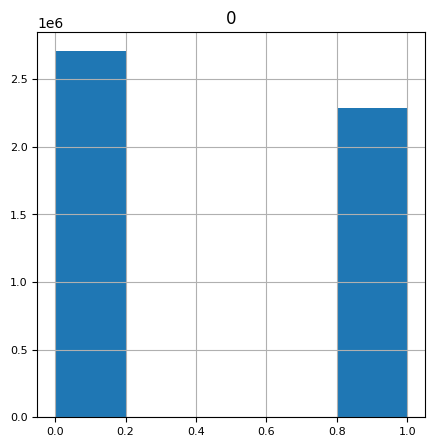

In [4]:
print(df[df.columns[0:1]].describe())
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

From this, wecan observe that the number of both 0 and 1 labels are almost equally distributed. 
And the mean is 0.46(approx) this further reassures this fact.
Also the std. deviation is 0.5(approx) and then Variance will be 0.25(approx).
as we know:-
Var(X) = (S.D)^2

                 1             2             3             4             5   \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.000318e+00  2.192580e-05 -4.994657e-05  9.994304e-01 -3.713140e-05   
std    6.873341e-01  1.003107e+00  1.001670e+00  6.542200e-01  1.002839e+00   
min    2.548815e-01 -2.102927e+00 -1.734789e+00  4.285860e-01 -2.059306e+00   
25%    5.624837e-01 -7.573512e-01 -8.673567e-01  5.969881e-01 -7.695916e-01   
50%    7.915511e-01  1.342127e-04 -3.880155e-04  7.997993e-01 -3.793710e-04   
75%    1.204413e+00  7.576486e-01  8.670981e-01  1.162353e+00  7.692296e-01   
max    2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01  2.059721e+00   

                 6             7             8             9             10  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean  -1.972243e-05  9.999744e-01  3.542352e-05  1.001437e+00 -4.878472e-05   
std    1.001631e+00  8.728877e-01  1.001654e+00  8.

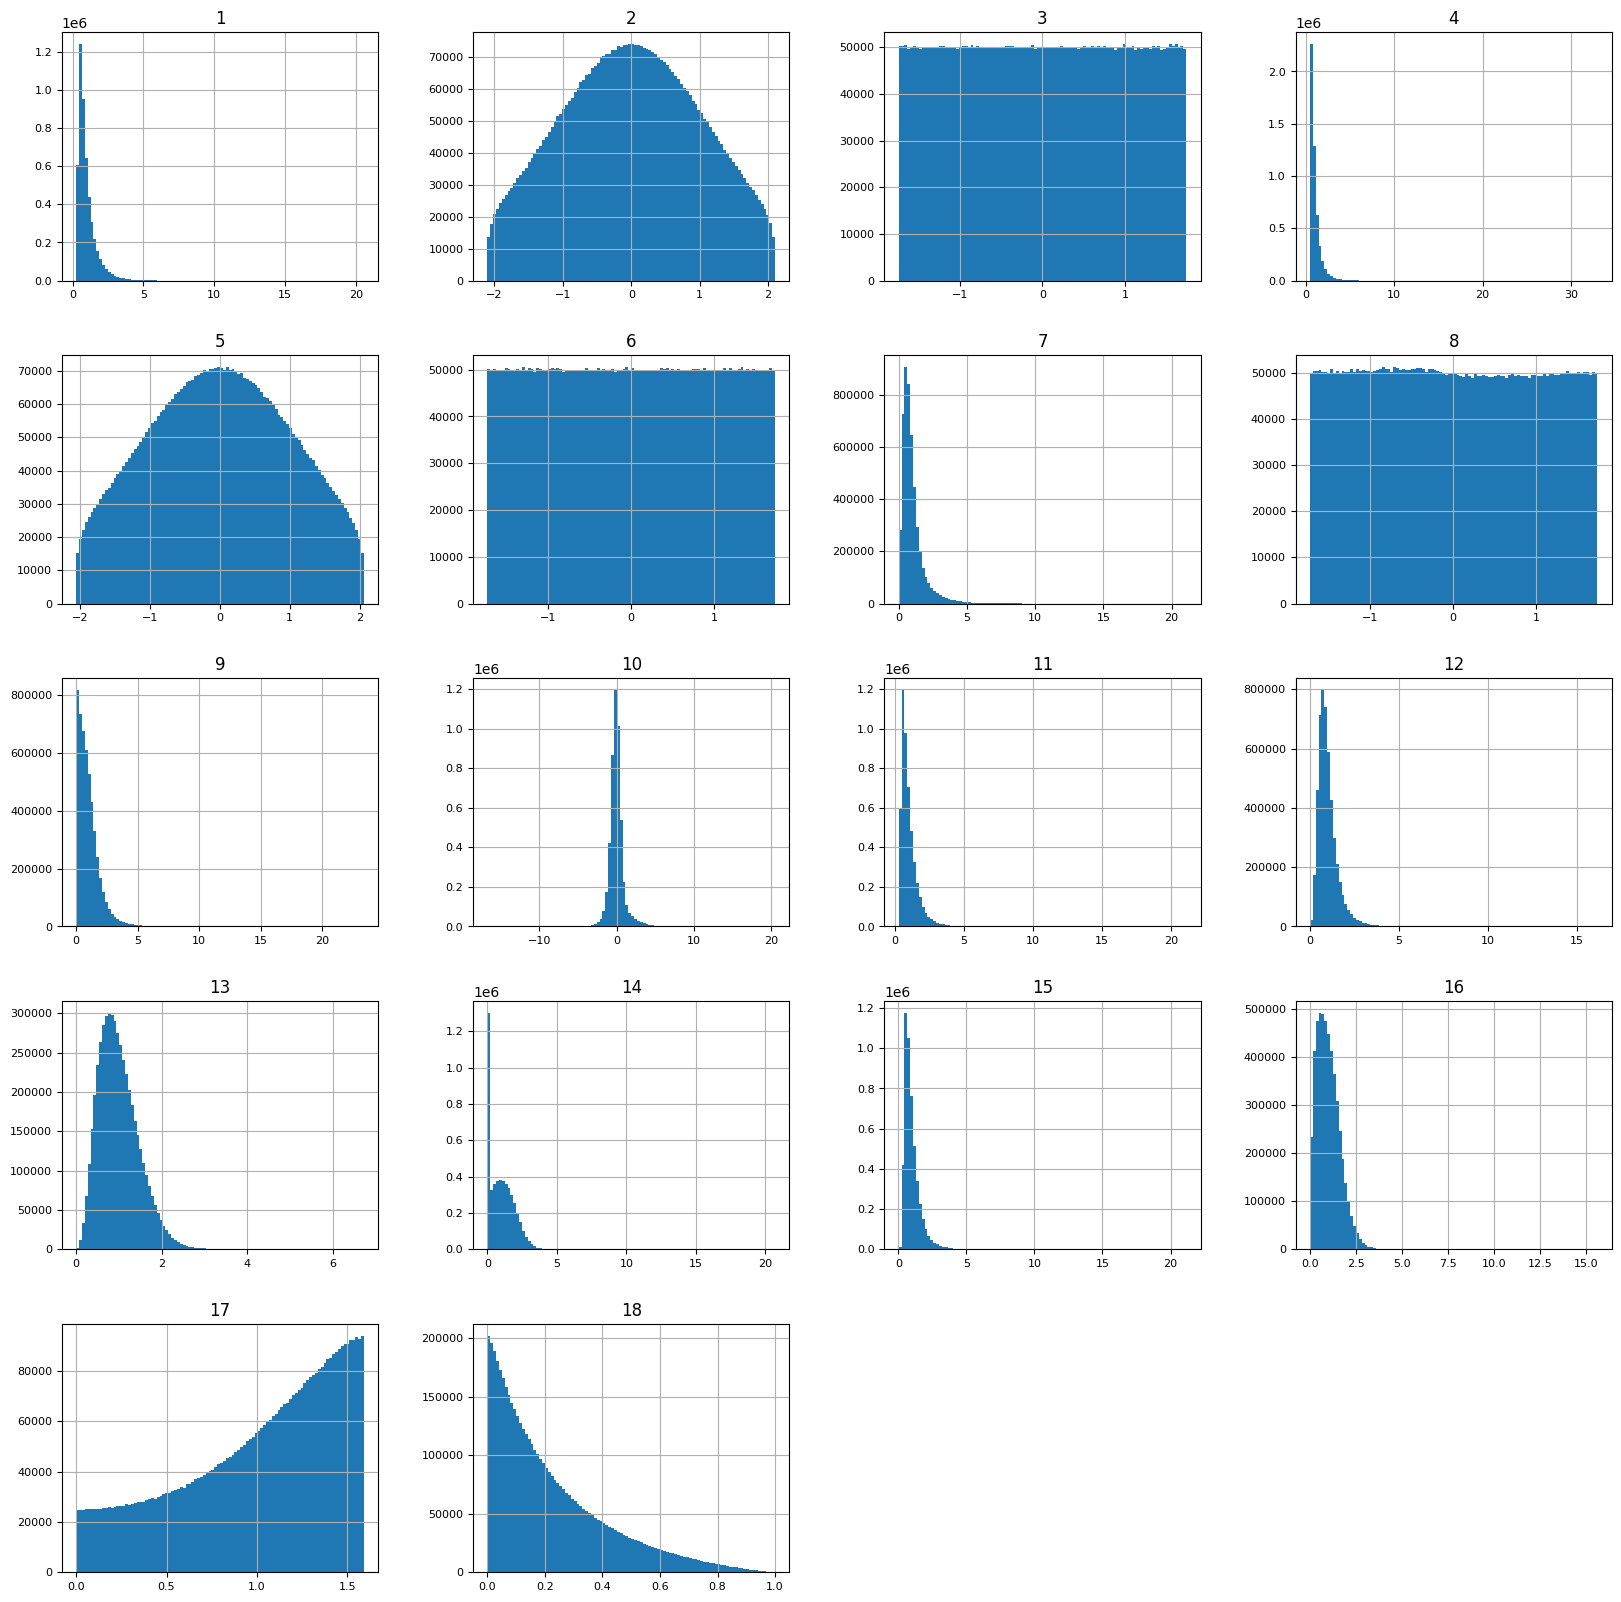

In [5]:
print(df[df.columns[1:19]].describe())
df[df.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

Here, we can see that features in columns 3,6,8 are almost evenly distributed along their range i.e. [-1.5,1.5]. Hence, we try to plot these separately to analyse them better for any outliers.
We also observe that the feature in column 14 has an abnormally high mode at the value 0 we analyse this further by making box plot and finding their mean, mode, quartiles. We see that features in column 2 and 5 are distributed similarly in [-2,2] so We further check their correlation which should be high.

**Box plot to identify outliers**

                  3             6             8
count  5.000000e+06  5.000000e+06  5.000000e+06
mean  -4.994657e-05 -1.972243e-05  3.542352e-05
std    1.001670e+00  1.001631e+00  1.001654e+00
min   -1.734789e+00 -1.734202e+00 -1.727117e+00
25%   -8.673567e-01 -8.683741e-01 -8.661510e-01
50%   -3.880155e-04  2.006134e-04 -9.172642e-03
75%    8.670981e-01  8.674778e-01  8.687620e-01
max    1.734839e+00  1.734686e+00  1.740689e+00


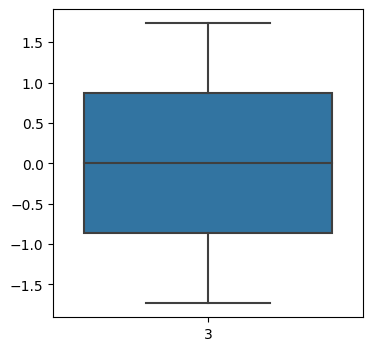

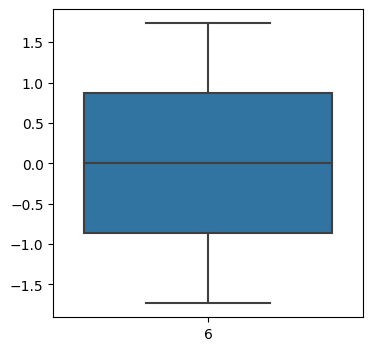

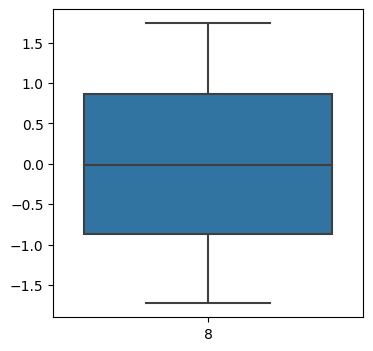

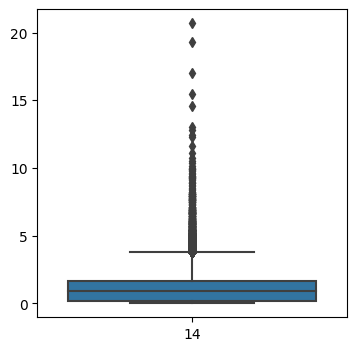

In [6]:
print(df[[3,6,8]].describe())
for i in [3,6,8,14]:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[[i]], orient='v')

Here we observe that, there are no outliers in the features in column 3,6,8 and every point lies in the interval [-1.5, 1.5]. We also see that the number of point with the value of feature 14 as 0 are as much as half. As the mean is 1 and the values lie between 0 and 2. But we see that the variation is quite significant as the std. deviation is ~0.86.


We now see the correlation of different features with the label so find out the important features and filter out the non-important features. Correlation helps us identify linear relationship between two variables. If the abs value of corr is high, that means the variables have strong linear dependence. We try to filter out the features by observing their correlation with the labels. For non-linear relationship, we further make scatter plots in the next section.

In [7]:
df_corr = df.corr()[[0]][1:19]
print(df_corr.sort_values(by=0,ascending=False))


           0
7   0.438821
12  0.423030
1   0.387397
9   0.282778
16  0.272992
18  0.268780
11  0.266589
15  0.258326
4   0.194794
13  0.111937
14  0.079421
10  0.077078
17  0.032656
5   0.000380
8   0.000110
6  -0.000099
2  -0.000328
3  -0.000462


We see that the features in columns 7, 12, 1, 9, 16, 11, 15, 4, 13 have absolute value of correlation coeff >0.1 where as others < 0.1

But, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the Label. For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

So we now make scatter plots of labels vs individual features, to inspect any non-linear relationship between the two

**Scatter Plots of labels vs feature values to identify non-linear relationship**

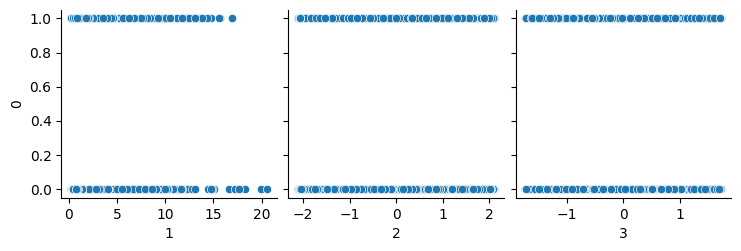

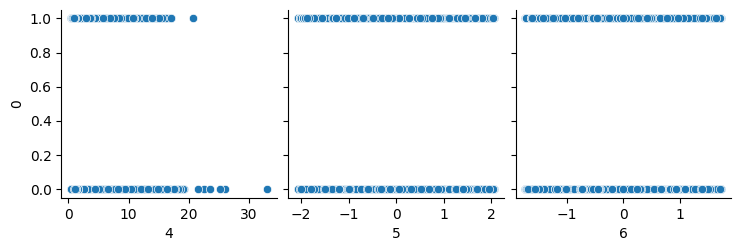

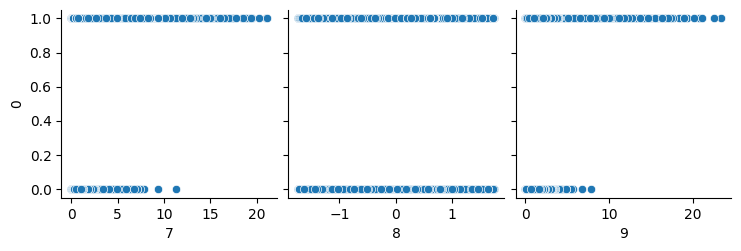

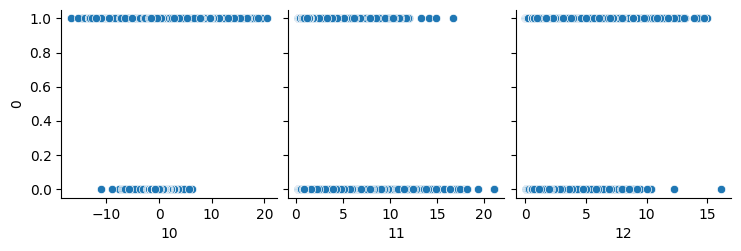

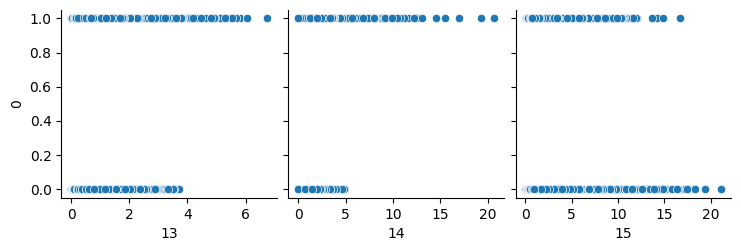

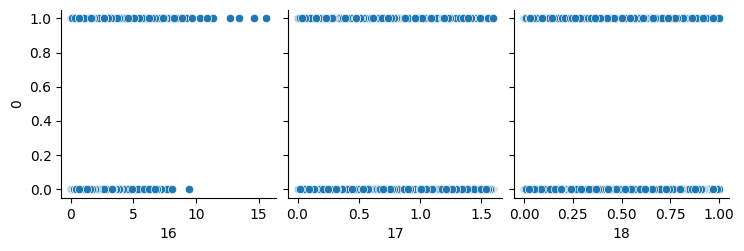

In [8]:
for i in range(1, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=[0])
     

Hence, we observe that the value of labels occur almost independently for the features in 17,5,8,6,2,3 which are also supported by the correlation of these features with labels being very low. But we also see that, there exists no non-linear realtion ship as well between these features and labels by observing the above plotted graphs.

#**Supervised Machine Learning Techniques**

Now,we aim to use the 18 features in the dataset to predict the target label, i.e. given a vector of features of physical measurements, predict whether the observation corresponds to a signal event or a background event.

To begin with, we first prepare the dataset as follows:

In [9]:
from sklearn.utils import shuffle

X = df.values[:,1:]
y = df.values[:,0]
 
#we shuffle the dataset as follows:
X, y = shuffle(X, y)
     

#**Decision Tree with Pruning**

Decision Tree is a simple tree-based classification method that builds a structure for taking decisions based on feature values. Each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

For this method, we used the first 1,000,000 examples for training and validation, with a 20% split of examples for testing (after randomly shuffling the data). Due to lack of computational power and the large size of the dataset, along with the computational complexity of the method, we have not trained our model on the complete corpus of 5,000,000 data points.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:100000], y[:100000], test_size=0.2, random_state=0)


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Training accuracy:", clf.score(X_train, y_train))
print("Testing accuracy:", clf.score(X_test, y_test))


Training accuracy: 1.0
Testing accuracy: 0.70625


As expected, we see that the decision tree has overfit on the training data. Even though it yields an accuracy of 100% on the training data, it exhibits poor performance on the test set yielding only 70% accuracy.

The different methods of regularization in a decision tree are:

1. Restricting the depth of the tree
2. Having a minimum number of samples to be maintained at the leaf.
3. Tree pruning

We now examine how tree pruning can be used as an effective means of regularization. Since sklearn only provides methods of post-pruning, we use minimum cost complexity pruning.

**Minimum Cost Complexity Pruning**

We first obtain the values of effective alphas computed at every node. This is done by calling the clf.cost_complexity_pruning_path function



In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

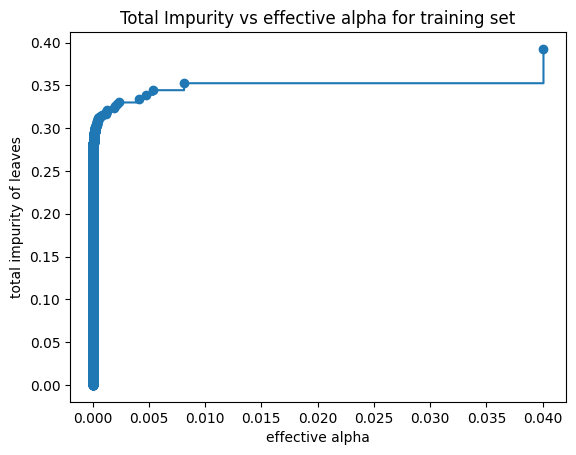

In [12]:

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [13]:
clfs = []

ccp_alphas = np.linspace(0.00005, 0.001, 10)
print(ccp_alphas.shape)
for ccp_alpha in ccp_alphas:
    print("Training with value: ", ccp_alpha)
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

(10,)
Training with value:  5e-05
Training with value:  0.00015555555555555556
Training with value:  0.0002611111111111111
Training with value:  0.00036666666666666667
Training with value:  0.00047222222222222224
Training with value:  0.0005777777777777778
Training with value:  0.0006833333333333333
Training with value:  0.0007888888888888889
Training with value:  0.0008944444444444445
Training with value:  0.001


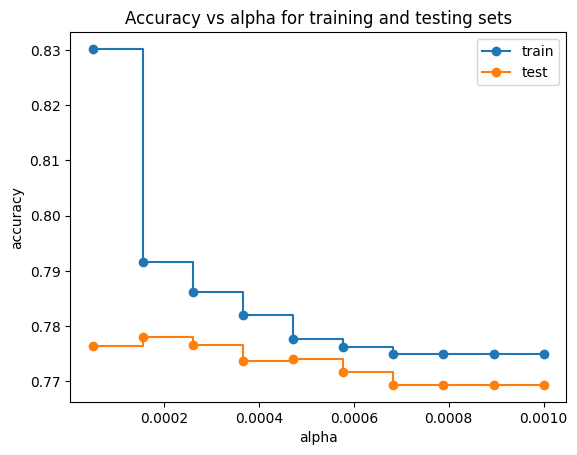

In [14]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
     

In [15]:
clf_final = DecisionTreeClassifier(random_state=0, ccp_alpha=1e-4)
clf_final.fit(X_train, y_train)
print("Training accuracy: ", clf_final.score(X_train, y_train))
print("Test accuracy: " , clf_final.score(X_test, y_test))

Training accuracy:  0.800975
Test accuracy:  0.7828


For this value of Alpha
we obtain a **test accuracy of 78%**

#**Random Forests**

The second method that we are going to examine is Random Forests. Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a collection or 'forest' of decision trees at training time. They output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Although similar to bagging with decision trees, the main difference is that, in random forests, the decision trees are built *on a random subset of features* as opposed to the complete feature set in bagging. This is done to ensure that the ensemble trees constructed are as uncorrelated as possible.

*As above, we have only used 1,000,000 out of the 5,000,000 datapoints in the corpus*



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:1000000], y[:1000000], test_size=0.2, random_state=0)

#create a RandomForestClassifier with 5 estimators
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)

print("Training done")
print("Training accuracy: ", clf.score(X_train, y_train))
print("Test set accuracy: ", clf.score(X_test, y_test))
     

Training done
Training accuracy:  0.97185125
Test set accuracy:  0.768255


We notice that although a high training accuracy was obtained on our model, the test accuracy is comparitively poor. Hence, we need to generalize our model to prevent overfitting. We do so by increasing the bias and decreasing the variance.

In this particular algorithm, the means of regularization in a Random Forest is by

1. decreasing the number of estimators or decision trees.
2. decreasing the maximum depth of the tree using the *max_depth* option.
However, decreasing the number of estimators also decreases the model capacity, thus reducing the model's ability to learn relationships among the data effectively. Thus we regularize by decreasing the maximum depth of the trees.

On varying the *max_depth* and increasing the number of estimators, we obtain the following results

For depth =  2
Training done
Training accuracy:  0.7557975
Test set accuracy:  0.75654

For depth =  4
Training done
Training accuracy:  0.77276125
Test set accuracy:  0.77323

For depth =  6
Training done
Training accuracy:  0.78182
Test set accuracy:  0.782195

For depth =  8
Training done
Training accuracy:  0.79085125
Test set accuracy:  0.79005

For depth =  10
Training done
Training accuracy:  0.7966175
Test set accuracy:  0.79354

For depth =  12
Training done
Training accuracy:  0.80595
Test set accuracy:  0.796535

For depth =  14
Training done
Training accuracy:  0.81905125
Test set accuracy:  0.79876

For depth =  16
Training done
Training accuracy:  0.83715375
Test set accuracy:  0.797645

For depth =  18
Training done
Training accuracy:  0.8585875
Test set accuracy:  0.7968



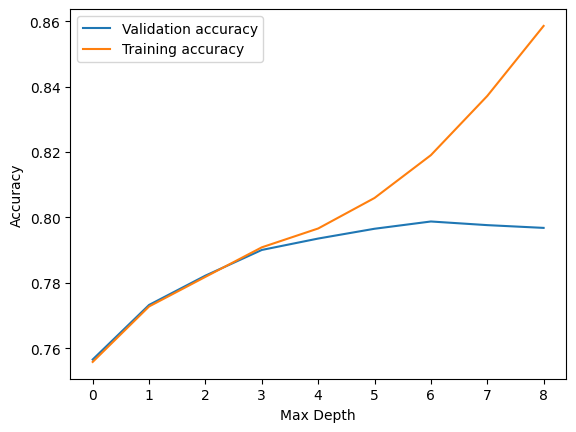

In [17]:
val_acc = []
tr_acc = []
for depth in range(2, 20, 2): 
  clf = RandomForestClassifier(n_estimators=10, max_depth = depth)
  clf.fit(X_train, y_train)
  print("For depth = ", str(depth))
  print("Training done")
  print("Training accuracy: ", clf.score(X_train, y_train))
  print("Test set accuracy: ", clf.score(X_test, y_test))
  val_acc.append(clf.score(X_test, y_test))
  tr_acc.append(clf.score(X_train, y_train))
  print()

plt.plot(val_acc, label='Validation accuracy')
plt.plot(tr_acc, label='Training accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Thus we notice that for a random forest with 10 trees, we obtain the best results when the maximum depth is restricted to 14. The validation accuracy is 79.8%

However, the major disadvantage is the prohibitively high training time. It takes a long time to train even a simple subset of the data.

#**Naive Bayes**
In machine learning, naïve Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with an assumption of strong (naïve) independence between the features. They are widely used in spam-mail classification systems.


In [18]:
from sklearn.naive_bayes import GaussianNB

#we use the entire training data set, with a 20% split for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Training Accuracy: ", gnb.score(X_train, y_train))
print("Testing Accuracy: ", gnb.score(X_test, y_test))

Training Accuracy:  0.73499875
Testing Accuracy:  0.735023


Although we do not reach a high accuracy, achieving results of 73%, a few major observations stand out:

1. Training time is very fast. Since the only calculations involved are calculating mean and variance for each class, along with frequency calculations, results are obtained almost instantaneously. This is despite the large number of training examples used (~5,000,000)
2. There is no overfitting. Naive Bayes generalizes well
3. There are no hyperparameters to tune. The algorithm runs deterministically and reports the same results with every run.

Thus, it gives a good, quick baseline, trained on the entire dataset

#**KNN**
K-Nearest Neighbours or KNN is a type of non-generalizing learning. 

The algorithm, when used to predict a new data point, computes the distance between the new data point and all the previously data points on which the model was trained. It then selects the k-nearest data points. A vote of their labels is taken and the majority label is assigned to the data point.

We use a subset of the data consisting of 10000 data points since kNN is a slow algorithm

We plot the training and validation accuracy for different values of k and obtain the following results:

Value of k:  10
Training accuracy:  0.7815
Validation accuracy:  0.7565

Value of k:  12
Training accuracy:  0.778125
Validation accuracy:  0.7605

Value of k:  14
Training accuracy:  0.777125
Validation accuracy:  0.765

Value of k:  16
Training accuracy:  0.774
Validation accuracy:  0.767

Value of k:  18
Training accuracy:  0.77625
Validation accuracy:  0.7585

Value of k:  20
Training accuracy:  0.77375
Validation accuracy:  0.765

Value of k:  22
Training accuracy:  0.772625
Validation accuracy:  0.7665

Value of k:  24
Training accuracy:  0.7725
Validation accuracy:  0.762

Value of k:  26
Training accuracy:  0.7705
Validation accuracy:  0.7625

Value of k:  28
Training accuracy:  0.7705
Validation accuracy:  0.764



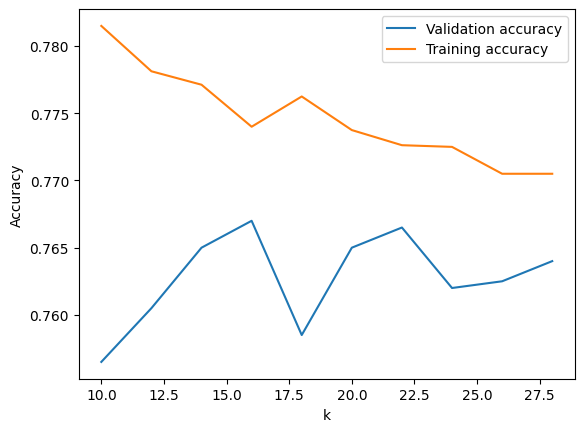

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=0)

val_acc = []
tr_acc = []

for k in range(10, 30, 2):
  clf = KNeighborsClassifier(k)
  clf.fit(X_train, y_train)
  print("Value of k: ", k)
  print("Training accuracy: ", clf.score(X_train, y_train))
  print("Validation accuracy: ", clf.score(X_test, y_test))
  val_acc.append(clf.score(X_test, y_test))
  tr_acc.append(clf.score(X_train, y_train))
  print()

plt.plot(range(10, 30, 2), val_acc, label='Validation accuracy')
plt.plot(range(10, 30, 2), tr_acc, label='Training accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Thus, we notice that the best results are obtained for k = 28, with test accuracy = 76%

#**ANN**

Artificial Neural Network or ANN is one of the most popular algorithm for classification today. It is a sequence of layers made up of nodes. The nodes of each layer are interconnected to the ones in the layer before and after it. Each connection is also given a weight. The input is propagated in the forward direction through the model and based on the output and the correct label, the error is calculated and propagated backwards through the model to update the weights. The presence of activation functions give the neural network its exceptional ability to learn non-linear decision boundaries. We are using the *keras* library to create our ANN Model.


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

neurons = [50, 100, 200, 300]
val_acc = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for hidden in neurons:
  model = Sequential([
      Dense(hidden, input_shape=(18,), activation='relu'),
      Dense(hidden, activation='relu'),
      Dense(hidden, activation = 'relu'),
      Dense(1),
      Activation('sigmoid'),
  ])

  adam = optimizers.Adam(lr=1e-3)

  model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=1024)
  scores = model.evaluate(X_test, y_test)
  val_acc.append(scores[1])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
3125/3125 [==============================] - 21s 6ms/step - loss: 0.4372 - accuracy: 0.7980 - val_loss: 0.4309 - val_accuracy: 0.8005
Epoch 2/10
3125/3125 [==============================] - 18s 6ms/step - loss: 0.4296 - accuracy: 0.8017 - val_loss: 0.4291 - val_accuracy: 0.8016
Epoch 3/10
3125/3125 [==============================] - 24s 8ms/step - loss: 0.4278 - accuracy: 0.8025 - val_loss: 0.4273 - val_accuracy: 0.8024
Epoch 4/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4271 - accuracy: 0.8028 - val_loss: 0.4273 - val_accuracy: 0.8023
Epoch 5/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4265 - accuracy: 0.8032 - val_loss: 0.4264 - val_accuracy: 0.8027
Epoch 6/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4262 - accuracy: 0.8034 - val_loss: 0.4267 - val_accuracy: 0.8025
Epoch 7/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4259 - accuracy: 0.8035 - val_loss: 0.4263 - val_ac

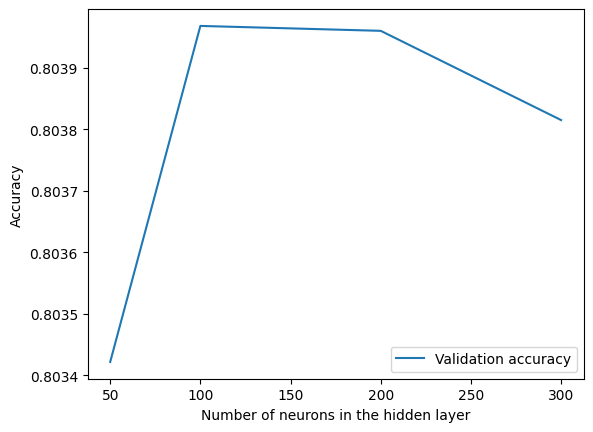

In [21]:
plt.plot(neurons, val_acc, label='Validation accuracy')
plt.xlabel("Number of neurons in the hidden layer")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We observe that the best validaton accuracy is obtained when the number of hidden nodes are 200

We now try to observe the effect of the activation function. We use the sigmoid activation function to check whether we get a better performance.

In [22]:
hidden = 200
model = Sequential([
      Dense(hidden, input_shape=(18,), activation='sigmoid'),
      Dense(hidden, activation='sigmoid'),
      Dense(hidden, activation = 'sigmoid'),
      Dense(1),
      Activation('sigmoid'),
  ])

adam = optimizers.Adam(lr=1e-3)

model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=1024)
scores = model.evaluate(X_test, y_test)
print("Validation accuracy: ", scores[1])

Epoch 1/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.4493 - accuracy: 0.7908 - val_loss: 0.4377 - val_accuracy: 0.7970
Epoch 2/10
3125/3125 [==============================] - 44s 14ms/step - loss: 0.4355 - accuracy: 0.7985 - val_loss: 0.4342 - val_accuracy: 0.7986
Epoch 3/10
3125/3125 [==============================] - 45s 15ms/step - loss: 0.4339 - accuracy: 0.7993 - val_loss: 0.4330 - val_accuracy: 0.7996
Epoch 4/10
3125/3125 [==============================] - 47s 15ms/step - loss: 0.4330 - accuracy: 0.7997 - val_loss: 0.4322 - val_accuracy: 0.8000
Epoch 5/10
3125/3125 [==============================] - 45s 14ms/step - loss: 0.4318 - accuracy: 0.8005 - val_loss: 0.4311 - val_accuracy: 0.8004
Epoch 6/10
3125/3125 [==============================] - 45s 15ms/step - loss: 0.4313 - accuracy: 0.8006 - val_loss: 0.4328 - val_accuracy: 0.7996
Epoch 7/10
3125/3125 [==============================] - 45s 14ms/step - loss: 0.4307 - accuracy: 0.8009 - val_loss: 0.4301 -

We observe that we get a slightly lower performance using sigmoid as the activation function.

#**Results**

We obtain the following results on each of the different classification techniques we used:

1. Decision tree with pruning: 78%
2. Random Forests: 79.8%
3. k-NN: 76%
4. Naive Bayes: 73%
5. Artificial Neural Networks: 80%